# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил Соколов Юрий Александрович БВТ2105

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



In [9]:
!python -m pip install networks
!python -m pip install numpy
!python -m pip install matplotlib


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Выполнение:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Функция считывания графа из файла как матрицу смежности
def read_graph(filename):
    with open(filename, 'r') as  f:
        graph = [list(map(int, line.strip().split()))  for line in f]
    return nx.from_numpy_array(np.matrix(graph), create_using = nx.DiGraph)

def draw_graph(graph, path=None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            if item[0] not in path or item[1] not in path:
                colors.append('black')
                continue
            idx1 = path.index(item[0])
            idx2 = path.index(item[1])
            if abs(idx1 - idx2) != 1:
                colors.append('black')
            else:
                colors.append('red')

    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'grey', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)

[1, 3, 5]


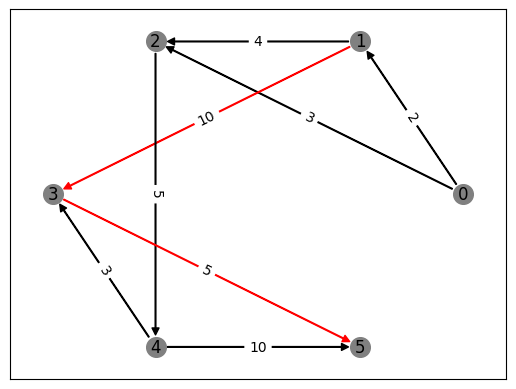

In [13]:
# Алгорит Дейкстры
import math
import queue
# Алгоритм поиска пути для ориентированного графа от одной вершины до другой
def dijkstra(graph, start, end):
    # Инициализируем очередь, в которую будем помещать вершины для рассмотрения расстояний
    Q = queue.Queue()
    # Добавим стартовую вершину в очередь
    Q.put(start)
    # Создадим массив расстояний, который заполним бесконечностями
    dist = [math.inf for x in range(len(graph))]
    dist[start] = 0
    # Пока очередь не пуста, то есть пока есть вершины на рассмотрении
    while not Q.empty():
        # Достанем из очереди вершину из которой будем искать пути к другим вершинам
        temp = Q.get()
        for i in range(len(graph[temp])):
            # Если путь есть и при этом он меньше старого пути
            if graph[temp][i] > 0 and graph[temp][i] + dist[temp] < dist[i]:
                # Перезапоминаем новый более короткий путь и добавляем новую вершину в очередь
                dist[i] = dist[temp] + graph[temp][i]
                Q.put(i)
    # После расчета кротчайих путей, восстановим сам путь
    path = []
    path.append(end)
    k = end
    flag = True
    while flag:
        flag = False
        # На первой итерации находясь в конце пути, если вычтем из длины пути вес ребра 
        # который сходится к этой вершине и получим длину пути до вершины из которой исходит это ребро
        # то значит путь проходил через эту вершину, добавим ее в путь и на последующих итерациях будем 
        # восстанавливать путь до этой вершины
        for i in range(len(graph)):
            if graph[i][k] > 0 and dist[k] - graph[i][k] == dist[i]:
                path.append(i)
                k = i
                flag = True
                break 
    return list(reversed(path))

# Читаем граф
G1 = [[0, 2, 3, 0, 0, 0], 
      [0, 0, 4, 10, 0, 0], 
      [0, 0, 0, 0, 5, 0], 
      [0, 0, 0, 0, 0, 5], 
      [0, 0, 0, 3, 0, 10], 
      [0, 0, 0, 0, 0, 0]]
#Проверяем результат
print(dijkstra(G1, 1, 5))
FILENAME = "g2.txt"
graph = read_graph(FILENAME)
path = dijkstra(G1, 1, 5)
draw_graph(graph, path=path)

[1, 3, 5]


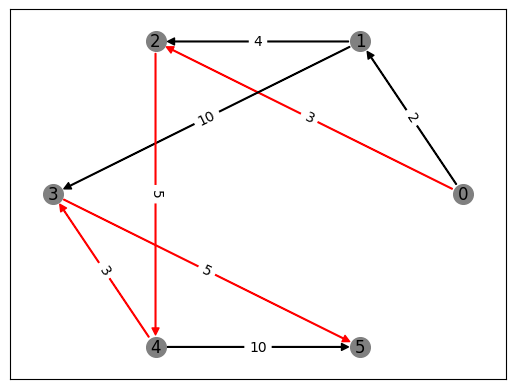

In [15]:
# Алгорит Флойда-Уоршелла
import math

def floyd_warshall(graph, start, end):
    dist = {}
    pred = {}
    nodes = list(graph.nodes())
    for i in nodes:
        dist[i] = {}
        pred[i] = {}
        for j in nodes:
            dist[i][j] = float('inf')
            pred[i][j] = None
        dist[i][i] = 0
        for neighbor in graph.neighbors(i):
            dist[i][neighbor] = graph.edges[i, neighbor]['weight']
            pred[i][neighbor] = i
            
    for k in nodes:
        for i in nodes:
            for j in nodes:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    pred[i][j] = pred[k][j]
    path = []
    node = end
    while node != start:
        path.append(node)
        node = pred[start][node]
    path.append(start)
    path.reverse()
    return path

print(path)
FILENAME = "g2.txt"
graph = read_graph(FILENAME)
path = floyd_warshall(graph, 0, 5)
draw_graph(graph, path=path)

[0, 2, 4, 3, 5]


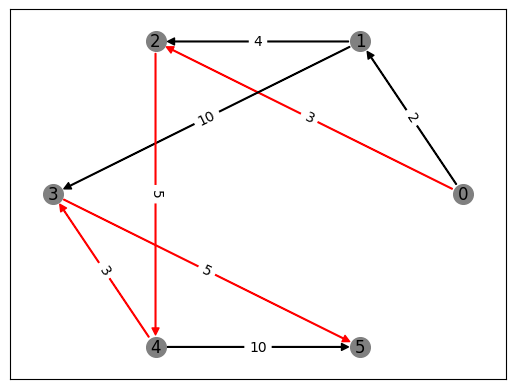

In [16]:
# Алгоритм Беллмана-Форда
# Суть алгоритма в том, что мы циклически по порядку перебираем все вершины, обновляя минимальное 
# расстояние на каждой итерации, когда обновлять будет нечего, алгоритм завершит работу

def bellman_ford(graph, start, end):
    nodes = list(graph.nodes())
    # Создадим массив расстояний, который заполним бесконечностями
    dist = [math.inf for x in range(len(graph))]
    dist[start] = 0
    # Создадим массив, куда будем записывать промежуточные вершины и заполним его ничем
    prev = [None for x in range(len(graph))]
    # 
    for i in range(len(nodes) - 1):
        for u, v in graph.edges():
            u_index = nodes.index(u)
            v_index = nodes.index(v)
            weight = graph[u][v]['weight']
            # Если новое расстояние меньше старого, перезапомним и пройденную вершину занесем в массив
            if dist[u_index] + weight < dist[v_index]:
                dist[v_index] = dist[u_index] + weight
                prev[v_index] = u
    path = []
    u = end
    while u is not None:
        path.append(u)
        u = prev[nodes.index(u)]
    return list(reversed(path))

print(path)
FILENAME = "g2.txt"
graph = read_graph(FILENAME)
path = bellman_ford(graph, 0, 5)
draw_graph(graph, path=path)

### Вывод